## Problem Statement:

    MOVIE RATING PREDICTION WITH PYTHON
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_movie=pd.read_csv('indian_movies.csv')

In [3]:
df_movie

,title,overview,original_language,release_date,genres,popularity,vote_average,vote_count
0,RRR,A fictional history of two legendary revolutio...,Telugu,2022-03-24,"Action, Drama",81.050,7.8,1020
1,Rocky Aur Rani Kii Prem Kahaani,"Gym-freak brat Rocky falls in love with Rani, ...",Hindi,2023-07-28,"Comedy, Drama, Family, Romance",36.450,0.0,0
2,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",Hindi,2022-02-04,"Action, Comedy, Crime",32.521,6.1,56
3,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,Hindi,2009-12-23,"Drama, Comedy",30.949,8.0,2119
4,Voice of Sathyanathan,A man is mistakenly suspected of being a threa...,Malayalam,2023-07-28,"Comedy, Drama",28.323,0.0,0
...,...,...,...,...,...,...,...,...
19946,Thedinen Vandhadhu,A man and his friend try to save a bag contain...,Tamil,1997-10-30,"Comedy, Romance",0.600,6.5,1
19947,Sishya,NaN,Tamil,1997-04-27,Drama,0.600,0.0,0
19948,Seeman,NaN,Tamil,1994-04-15,Drama,0.600,0.0,0
19949,"My Son, My Precious",A teacher comes to a village and an old man as...,Assamese,1981-04-01,NaN,0.600,0.0,0


In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19951 entries, 0 to 19950
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              19951 non-null  object 
 1   overview           18277 non-null  object 
 2   original_language  19951 non-null  object 
 3   release_date       18058 non-null  object 
 4   genres             15632 non-null  object 
 5   popularity         19951 non-null  float64
 6   vote_average       19951 non-null  float64
 7   vote_count         19951 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [5]:
df_movie.dropna(inplace=True)

In [6]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14115 entries, 0 to 19946
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              14115 non-null  object 
 1   overview           14115 non-null  object 
 2   original_language  14115 non-null  object 
 3   release_date       14115 non-null  object 
 4   genres             14115 non-null  object 
 5   popularity         14115 non-null  float64
 6   vote_average       14115 non-null  float64
 7   vote_count         14115 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 992.5+ KB


In [7]:
df_movie.head(10)

,title,overview,original_language,release_date,genres,popularity,vote_average,vote_count
0,RRR,A fictional history of two legendary revolutio...,Telugu,2022-03-24,"Action, Drama",81.050,7.8,1020
1,Rocky Aur Rani Kii Prem Kahaani,"Gym-freak brat Rocky falls in love with Rani, ...",Hindi,2023-07-28,"Comedy, Drama, Family, Romance",36.450,0.0,0
2,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",Hindi,2022-02-04,"Action, Comedy, Crime",32.521,6.1,56
3,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,Hindi,2009-12-23,"Drama, Comedy",30.949,8.0,2119
4,Voice of Sathyanathan,A man is mistakenly suspected of being a threa...,Malayalam,2023-07-28,"Comedy, Drama",28.323,0.0,0
5,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",Hindi,1995-10-20,"Comedy, Drama, Romance",28.244,8.6,4186
6,Bāhubali: The Beginning,The young Shivudu is left as a foundling in a ...,Telugu,2015-07-10,"Action, Adventure, Drama, Fantasy",27.127,7.5,681
7,Lust Stories 2,"Four eminent Indian directors explore sex, des...",Hindi,2023-06-29,"Drama, Romance",26.416,5.4,18
8,Bawaal,"Ajay Dixit, an ordinary history teacher in a h...",Hindi,2023-07-21,"Drama, Romance, Comedy, History",24.939,6.2,10
9,BRO,"After being fatally injured in a car crash, a ...",Telugu,2023-07-27,"Comedy, Drama, Fantasy",24.525,9.0,2


In [8]:
df_movie[['popularity', 'vote_average', 'vote_count']].describe()

,popularity,vote_average,vote_count
count,14115.000000,14115.000000,14115.000000
mean,1.853445,3.778066,8.943110
std,2.085980,3.196575,50.589742
min,0.600000,0.000000,0.000000
25%,0.683000,0.000000,0.000000
50%,1.278000,4.900000,1.000000
75%,2.127000,6.500000,6.000000
max,81.050000,10.000000,4186.000000


Correlation between popularity, vote_average, and vote_count

In [9]:
corr_matrix = df_movie[['popularity', 'vote_average', 'vote_count']].corr()

In [10]:
corr_matrix

,popularity,vote_average,vote_count
popularity,1.000000,0.326848,0.524801
vote_average,0.326848,1.000000,0.157826
vote_count,0.524801,0.157826,1.000000


In [11]:
#Calculate popularity ratio(popularity divide by vote count)
df_movie['popularity_ratio'] = df_movie['popularity']/ df_movie['vote_count']

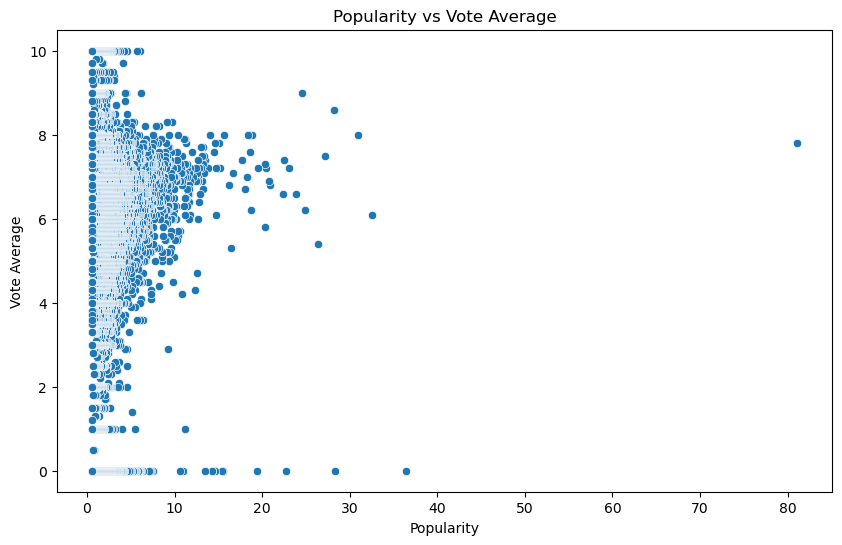

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movie, x='popularity', y='vote_average')
plt.title("Popularity vs Vote Average")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.show()

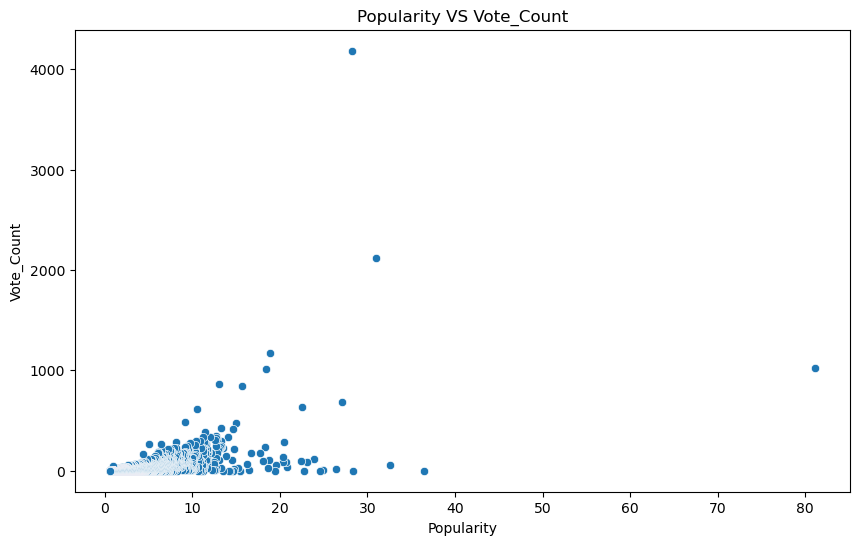

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_movie, x = 'popularity',y = 'vote_count')
plt.title("Popularity VS Vote_Count")
plt.xlabel('Popularity')
plt.ylabel('Vote_Count')
plt.show()

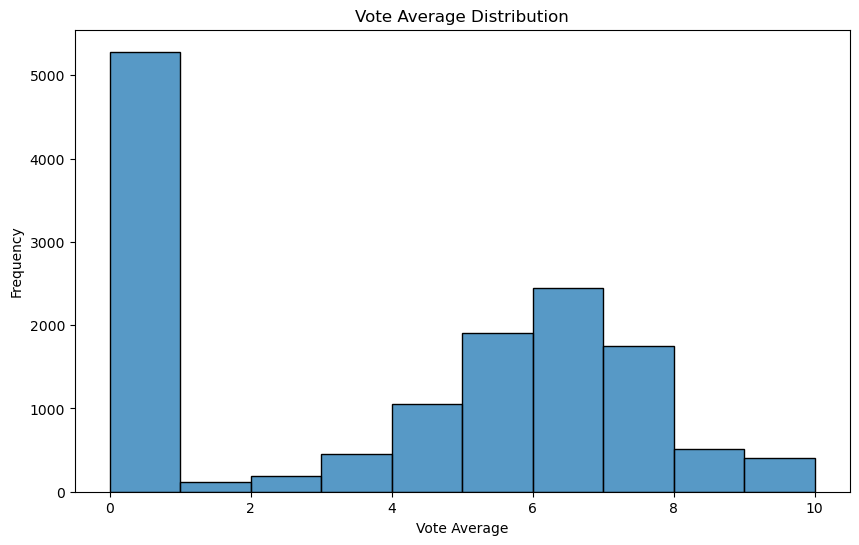

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_movie, x ='vote_average',bins = 10)
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Extracting genres and splitting them into separate rows
genre_data = df_movie['genres'].str.split(', ').explode()
#Average Popularity by genre


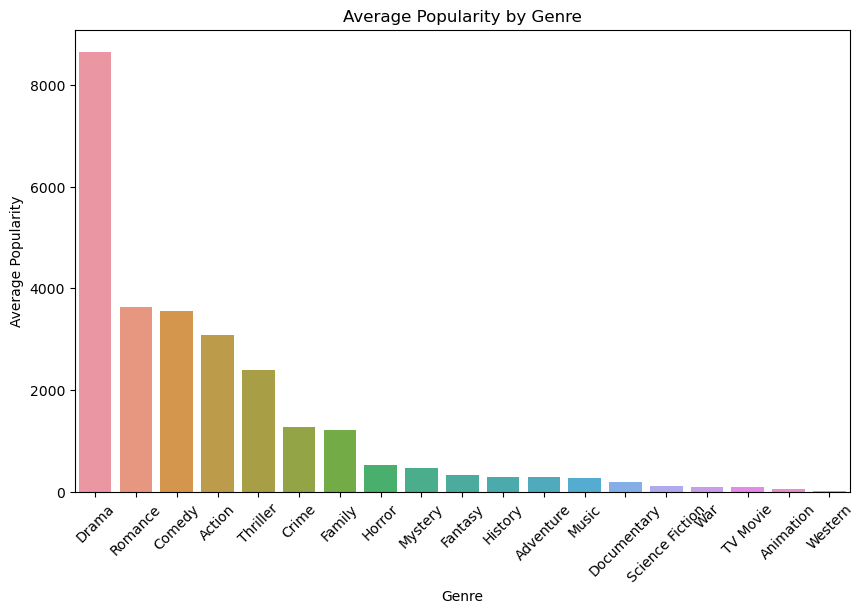

In [17]:
plt.figure(figsize = (10,6))
sns.barplot(data=genre_data.value_counts().reset_index(), x='index', y='genres')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

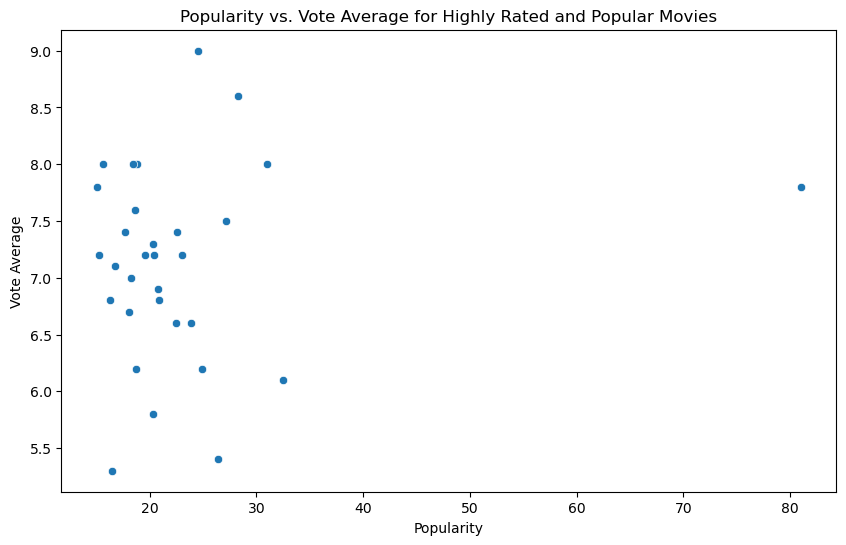

In [18]:
# Scatter plot: Popularity vs. Vote Average for Highly Rated Movies
highly_rated_popular = df_movie[(df_movie['vote_average'] >= 4.0) & (df_movie['popularity'] >= 15)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=highly_rated_popular, x='popularity', y='vote_average')
plt.title('Popularity vs. Vote Average for Highly Rated and Popular Movies')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

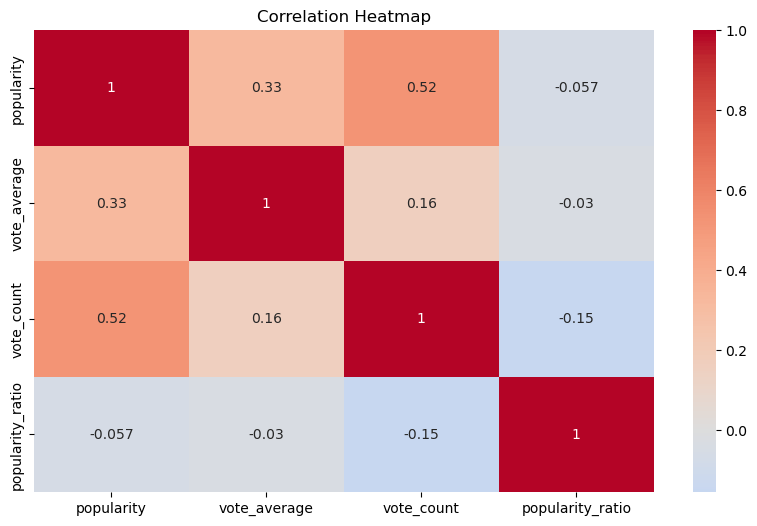

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_movie.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

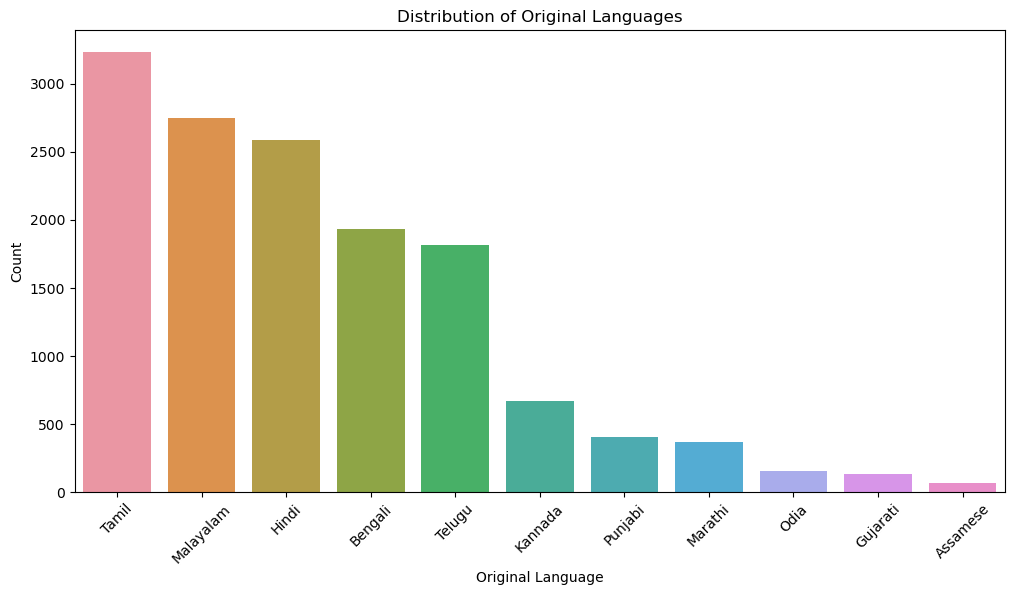

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_movie, x='original_language', order=df_movie['original_language'].value_counts().index)
plt.title('Distribution of Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

!pip install wordcloud

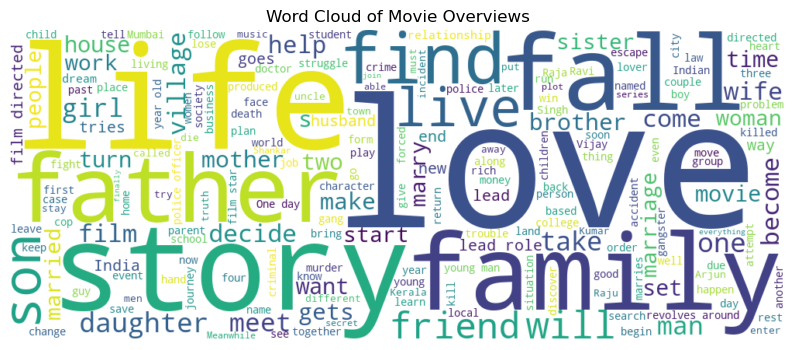

In [21]:
from wordcloud import WordCloud

#combine all overview into single string
all_overview = ' '.join(df_movie['overview'])

#generate a word cloud
wordcloud = WordCloud(width = 1000, height = 400, background_color = 'white').generate(all_overview)

#display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.title('Word Cloud of Movie Overviews')
plt.axis('off')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = df_movie[['popularity', 'vote_count']]
y = df_movie['vote_average']

In [24]:
X_train, X_test,y_train,y_test = train_test_split(X,y , test_size =0.2, random_state =42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.607007534431197
R-squared: 0.12936488738863905


## Conclusion


##### Movie Rating Prediction with Python

In conclusion, the Movie Rating Prediction project ventures into the realm of cinema and data science, combining the art of filmmaking with the power of technology. By harnessing the potential of Python programming and regression techniques, we embarked on a journey to predict movie ratings based on crucial features 